##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    <h1 style = "font-size:48px; font-weight:normal"><b>AI</b>-TECH</h1>
    <br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">Przykład 3 DO LABORATORIUM 1</h1>
    <h1 style = "font-size:24px">z UCZENIA MASZYNOWEGO</h1>
    <h1 style = "font-size:24px">Klasyfikacja nadzorowana </h1>
    <h1 style = "font-size:24px">Szymon Zaporowski</h1>
    <h3 style = "font-size:21px">Regresja logistyczna, SVM i Drzewa Losowe - wykorzystanie danych z MNIST i tensorflow do porównania klasyfikatorów</h3>
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

![stopka.svg](stopka.svg)

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej" 
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

<hr>

# 1. Przykład 3

Aby porównać działanie Regresji Logistycznej i SVM oraz algorytmu lasów losowych posłużymy się przykładem, który został wykorzystany w trakcie poprzedniego laboratorium i pierwotnie dotyczył tylko regresji liniowej.
Ponownie wykorzystany zostanie zbiór danych MNIST, który zawiera 70 tysięcy obrazków o rozdzielczości 28x28 w odcieniach szarości, który został zebrany przez Yann’a Lecun (http://yann.lecun.com/exdb/mnist/). Obrazki te zawierają zeskanowane zapisy cyfr: 0-9. Daje to do dyspozycji 10 klas (0-9).
Zbiór ten można wczytać na wiele róznych sposobów do projektu, ale żeby uniknąć w tym momencie pewnego preprocessingu skorzystamy z możliwości biblioteki tensorflow.

Podobnie jak poprzednio, do celów aktualnego ćwiczenia przemodelujemy opis klas do problemu binarnego w którym cyfry od 0 do 8 będą stanowić klasę 0, zaś klasę 1 będzie stanowić cyfry 9.


In [5]:
# Import podstawowych bibliotek
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import keras
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from io import StringIO
import requests
from random import randint
from sklearn import svm #Zaimporotowanie modelu SVM z packietu sklearn 
from sklearn import metrics #Import modułu metrics z pakietu scikit-lear do policzenia miary dokładności klasyfikatora
import seaborn as sns
import pandas as pd
print(tf.__version__)
print('keras:',keras.__version__)


2.8.0
keras: 2.8.0


W takim rozwiązaniu, zbiór wejściowy jest wczytywany od razu z podziałem na zbiór treningowy (60000) oraz testowy (10000). Zbiór testowy zostanie wykorzystany później do oceny treningu i wyznaczenia miar błędów.

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

print("Training set size: ", X_train.shape)
print("Test set size: ", X_test.shape)


Training set size:  (60000, 28, 28)
Test set size:  (10000, 28, 28)


Do celów aktualnego ćwiczenia przemodelujemy opis klas, tak aby uzyskać problem binarny, w którym cyfry od 0 do 8 będą stanowić klasę 0, zaś klasę 1 będzie stanowić cyfry 9.

In [7]:
y_train_binary = np.where(y_train < 9, 0.0, 1.0).reshape(y_train.shape[0], 1)
y_train_binary = y_train_binary.astype('float32')

Dane wejściowe traktujemy jako zbiór cech, stąd "spłaszczamy" reprezentację 2D do reprezentacji 1D (28*28 -> 784).
Taka spłaszczona reprezentacja obrazka przemnożona przez ilość obrazków występujących w rozważanym zbiorze daje nam wektor, który jest łatwiejszy do przetwarzania przez algorytmy uczenia maszynowego. Wartości te zostają również znormalizowane do przedziału [0,1].

In [8]:
#przygotowanie danych treningowych jako wektor znormalizowany
X_train_flat = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_train_flat = X_train_flat.astype('float32')/255.0
print("Input dataset shape: ", X_train_flat.shape)

#przygotowanie danych testowych jako wektor znormalizowany
y_test_binary = np.where(y_test < 9, 0.0, 1.0).reshape(y_test.shape[0], 1)
y_test_binary = y_test_binary.astype('float32').flatten()
X_test_flat = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
X_test_flat = X_test_flat.astype('float32')/255.0
print("Test dataset shape: ", X_test_flat.shape)

Input dataset shape:  (60000, 784)
Test dataset shape:  (10000, 784)


Przykładowy obraz z bazy danych, jego oryginalna etykieta oraz aktualna przynależność do klasy została przedsatwiona w poniższej sekcji.

True orginal label : 0
True binary label : [0.]


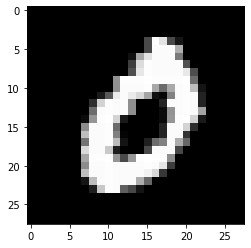

In [9]:
example = randint(0, 100)
plt.imshow(X_train[example], cmap="gray")
print("True orginal label :", y_train[example])
print("True binary label :", y_train_binary[example])

W tym kroku dopasowujemy model regresji logistycznej do "spłaszczonych" danych wejściowych oraz prezentujemy wynik predykcji dla zbioru danych testowych

In [10]:
model = LogisticRegression(solver='newton-cg',random_state=0).fit(X_train_flat, y_train_binary.flatten())

print("Wynik ewaluacji wytrenowanego modelu: ", model.score(X_test_flat, y_test_binary.flatten()))

Wynik ewaluacji wytrenowanego modelu:  0.9674


C:\Projekty\UM\venv\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Projekty\UM\venv\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Mając wytrenowany model można go użyć do oceny prognozy $p$ innego wektora wejściowego. Dodatkowo doknamy predykcji dla całego zbioru testowego.

Wartość prognozy dla wybranego przypadku:  [1.]
Prawdziwa etykieta klasy dla wybranego przypadku:  1
Przewidywana etykieta klasy dla wybranego przypadku:  1


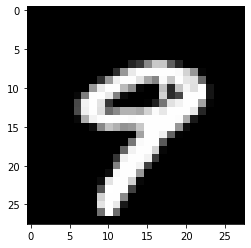

In [11]:
test_example = 9
p = model.predict(X_test_flat[test_example:test_example+1])

# Wyswietlenie wartości prognozy ("prawdopodobieństwa") p z przedziału [0,1]
print("Wartość prognozy dla wybranego przypadku: ", p)
print("Prawdziwa etykieta klasy dla wybranego przypadku: ", int(y_test_binary[test_example]))
#Predykcja odpowiedzi modelu na dane testowe 

# Użycie wartości progu w celu przypisania do odpowiednich klas 
predicted_class = 0 if p < 0.5 else 1
print("Przewidywana etykieta klasy dla wybranego przypadku: ", predicted_class)

plt.imshow(X_test[test_example], cmap="gray")

y_pred = model.predict(X_test_flat) # Predykcja dla całego zbioru testowego

Sprawdzimy jak wyglądają wyniki z wykorzystaniem macierzy pomyłek

Text(0.5, 257.44, 'Etykieta przewidziana przez model')

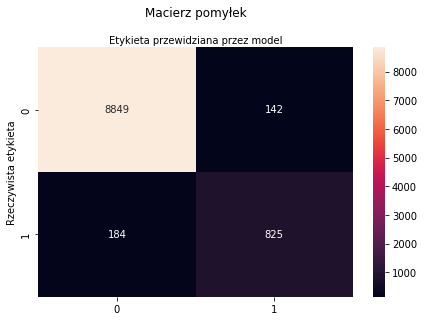

In [12]:
#Tworzenie macierzy pomyłek dla testowanego klasfikatora
cnf_matrix = metrics.confusion_matrix(y_test_binary, y_pred)
cnf_matrix
class_names=[0,1] # nazwy klas
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# tworzenie mapy cieplnej
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Macierz pomyłek', y=1.1)
plt.ylabel('Rzeczywista etykieta')
plt.xlabel('Etykieta przewidziana przez model')

Po macierzy pomyłek widać, że zgodnie z założeniami otrzymujemy wyniki tylko w obrębie dwóch klas - 0 oraz 1. Można jednak zauważyć, że przez dokonanie ingerencji w klasy obecnie klasa 0 zawiera znacznie więcej przykładów niż klasa 1. Do czego to prowadzi będzie dokładnie widać po obliczeniu metryk precission i recall.
Inicjalizujemy klasyfiokator oparty o SVM, podobnie jak to było w przykładzie 1.

In [26]:
# clf = svm.SVC(C=10, kernel='poly',degree=5, probability=False, max_iter=1000, decision_function_shape='ovo')
clf = svm.SVC(C=10, max_iter=100, kernel='rbf')
#Trening modelu z wykorzystaniem danych treningowych
clf.fit(X_train_flat, y_train_binary.flatten())
#Predykcja odpowiedzi modelu na dane testowe 
y_pred = clf.predict(X_test_flat)

C:\Projekty\UM\venv\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Dokonujemy obliczeń miar: accuracy, precision i recall.

In [27]:
# Obliczenie dokładności klasyfikatora, jak często klasyfikator klasyfikuje poprawnie
print("Miara accuracy:",metrics.accuracy_score(y_test_binary, y_pred))
y_score = clf.decision_function(X_test_flat)
# Obliczenia wartości miary precisson dla modelu: (precission to stosunek wartości prawdziwie pozytywnych wyników do sumy wartości prawdzwie pozytywnych wyników i wyników fałszywie pozytywnych  
print("Wartość miary precission dla wytrenowanego modelu:",metrics.precision_score(y_test_binary, y_pred, average="weighted"))
# Obliczenia wartości miary recall dla modelu: (recal to stosunek wartości prawdziwie pozytywnych wyników do sumy wyników prawdziwie pozytywnych i fałszywie negatywnych)
print("Wartość miary recall dla wytrenowanego modelu:",metrics.recall_score(y_test_binary, y_pred, average="weighted"))

Miara accuracy: 0.9404
Wartość miary precission dla wytrenowanego modelu: 0.9402955297995846
Wartość miary recall dla wytrenowanego modelu: 0.9404


Po dokonaniu klasyfikacji z użyciem SVM widać, iż metryka accuracy jest na całkiem niezłym poziomie i wynosi ponad 80%. Patrząc tylko na tę metrykę można przypuszczać, iż model sprawuje się całkiem dobrze. Zwracając jednak uwage na pozostałe metryki widać dosyć niepokojące wartości - oscylujące w granicach poniżej 0.16. Oznacza to, iż ze względu na dysproporcję w danych i przewagę ilość danych w jednej klasie klasyfikator zaczyna dokonywać 

Dla pewności obliczny jeszcze macierz pomyłek - można będzie bezpośrednio porównać Regresję Liniową z SVM.

Text(0.5, 257.44, 'Etykieta przewidziana przez model')

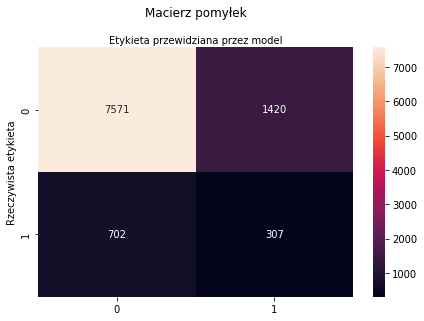

In [15]:
#Tworzenie macierzy pomyłek dla testowanego klasfikatora
cnf_matrix = metrics.confusion_matrix(y_test_binary, y_pred)
cnf_matrix
class_names=[0,1] # nazwy klas
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# tworzenie mapy cieplnej
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Macierz pomyłek', y=1.1)
plt.ylabel('Rzeczywista etykieta')
plt.xlabel('Etykieta przewidziana przez model')

Dodajmy jeszcze kalsyfikator oparty o algortym lasów losowych

In [16]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Dokonamy od razu incicjalizacji i predykcji z użcyiem tego algorytmu i otrzymamy miarę accuracy.

In [33]:
rf = RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 42)
rf.fit(X_train_flat, y_train_binary.flatten())
predictions_forest = rf.predict(X_test_flat)
print('Wynik dla miary accuracy:')
accuracy_score(y_test_binary, predictions_forest)

Wynik dla miary accuracy:


0.9851

Miara accuracy wygląda bardzo dobrze, szczególnie porównując z pozostałymi klasyfikatorami. A jak wyglądają pozostałe miary?

In [34]:
classification_report(y_test_binary, predictions_forest, output_dict= True, target_names=[0,1])

{0: {'precision': 0.9851843722563652,
  'recall': 0.9984428873317762,
  'f1-score': 0.9917693200022096,
  'support': 8991},
 1: {'precision': 0.9842342342342343,
  'recall': 0.8662041625371655,
  'f1-score': 0.9214549288350027,
  'support': 1009},
 'accuracy': 0.9851,
 'macro avg': {'precision': 0.9847093032452998,
  'recall': 0.9323235249344708,
  'f1-score': 0.9566121244186061,
  'support': 10000},
 'weighted avg': {'precision': 0.9850885033299323,
  'recall': 0.9851,
  'f1-score': 0.9846745979334384,
  'support': 10000}}

# Zadania do wykonania

<p><b>Zadanie 1</b></p>
Przeprowadź eksperyment, porównaj klasyfikację z wykorzystaniem regresji liniowej oraz z SVM  i algorytmem lasów losowych. Zmień nastawy klasyfikatora SVM i przetestuj wszystkie funkcje jądra. Zrób podobnie dla lasów losowych wykorzystując wiedzę zdobytą w przykłądzie 2. Które nastawy sprawują się najlepiej, a które mają problemy?

<p><b>Zadanie 2</b></p>
Zmień przyporządkowanie do klas i sprawdź jak wpłynie to na wyniki klasyfikacji z wykorzystaniem SVM i lasów losowych. Zwróć szczególną uwagę na to w jaki sposób zmieniają się metryki po ponownym treningu. Jak wyjaśnisz różnicę między metrykami preccison i recall dla SVM? 


![stopka.svg](stopka.svg)